<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/EmbeddedMethods_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LogisticRegression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Total features: {X_train.columns}")
X_train.head()
X_train.shape
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(X_train_scaled, y_train)
sel_.get_support()

selected_features = X_train.columns[sel_.get_support()]
print(f"Selected features: {selected_features}")

removed_features = X_train.columns[~sel_.get_support()]
print(f"Removed features: {removed_features}")


X_train_selected = sel_.transform(X_train_scaled)
X_test_selected = sel_.transform(X_test_scaled)
X_train_selected.shape, X_test_selected.shape

(455, 30)

### Lasso

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(f"Total features: {X_train.columns}")
X_train.shape
X_train.head()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sel_ = SelectFromModel(Lasso(alpha=0.01, random_state=10))
sel_.fit(X_train_scaled, y_train)
sel_.get_support()

selected_features = X_train.columns[sel_.get_support()]
print(f"Selected features: {selected_features}")

removed_features = X_train.columns[~sel_.get_support()]
print(f"Removed features: {removed_features}")

X_train_selected = sel_.transform(X_train_scaled)
X_test_selected = sel_.transform(X_test_scaled)
X_train_selected.shape, X_test_selected.shape


((15480, 7), (5160, 7))

### Decision trees

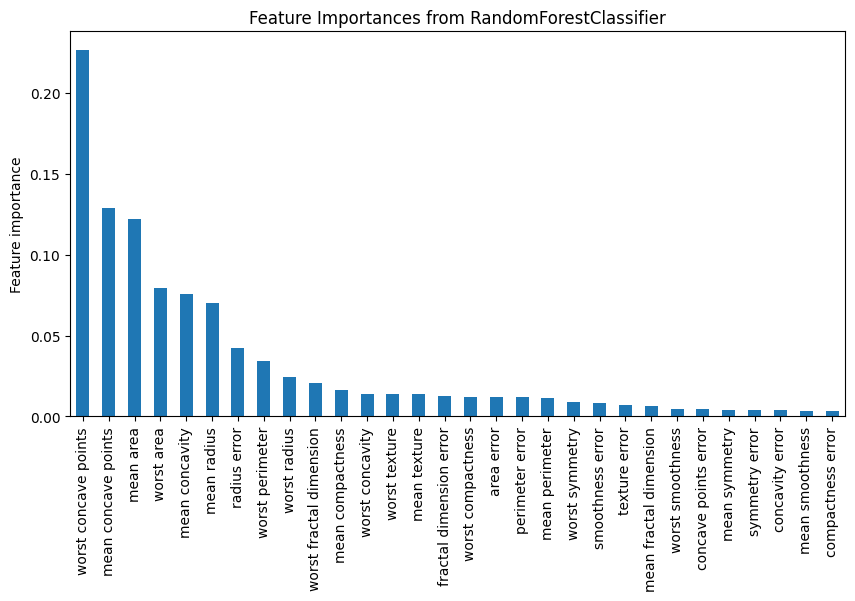

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(f"Total features: {X_train.columns}")
X_train.shape
X_train.head()



sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))
sel_.fit(X_train, y_train)
sel_.get_support()

selected_features = X_train.columns[sel_.get_support()]
print(f"Selected features: {selected_features}")

removed_features = X_train.columns[~sel_.get_support()]
print(f"Removed features: {removed_features}")

X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)
X_train_selected.shape, X_test_selected.shape


feature_importances = pd.Series(sel_.estimator_.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

feature_importances.plot.bar(figsize=(10, 5))
plt.ylabel('Feature importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

In [ ]:
!pip install sagemaker